In [2]:
import matplotlib.pyplot as plt
import matplotlib
%reload_ext autoreload
%autoreload 2
from sklearnex import patch_sklearn

patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
import pickle

import pandas as pd
from pathlib import Path
import numpy as np
import math
import sklearn
from scipy.stats import levene, ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from utils import get_target_group
from utils import save_to_pickle
from utils import load_pickle

In [3]:
p = Path('./resources/temp_file/final_extract_results.pkl')
final_results_df = pd.read_pickle(p)

In [7]:
final_results_df: pd.DataFrame
final_results_df

,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,...,gradient_glszm_ZoneVariance,gradient_ngtdm_Busyness,gradient_ngtdm_Coarseness,gradient_ngtdm_Complexity,gradient_ngtdm_Contrast,gradient_ngtdm_Strength,label,process_index,stem,patient_ID
0,v3.1.0,1.21.6,2.2.1,1.3.0,3.7.9,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {}, 'Lo...",ed56dfd16b94093bb78ace3a0bd739f8e0d877c2,3D,"(1.0, 1.0, 1.0)",...,2.175838e+06,10.218170,0.049777,0.008120,4.500440e-05,0.050537,1,0,B-00073B8A5734D5E5D21C6E9B04299C3F,00001E
1,v3.1.0,1.21.6,2.2.1,1.3.0,3.7.9,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {}, 'Lo...",8ef55464a40ae22f61f193f0992c28e56d1cf5ef,3D,"(1.0, 1.0, 1.0)",...,1.533044e+07,321.873332,0.000793,0.122848,2.118807e-04,0.003918,1,1,B-000C017A869153D099C1AA9B0C892CF1,00002E
2,v3.1.0,1.21.6,2.2.1,1.3.0,3.7.9,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {}, 'Lo...",c5b7e4cc8b3304b8a9879d11034c9deb7271fd5f,3D,"(1.0, 1.0, 1.0)",...,1.984614e+08,92.457669,0.002721,0.022308,1.193983e-05,0.013522,1,2,B-0011E7D1D5506FE65860A7C161441B8E,00003E
3,v3.1.0,1.21.6,2.2.1,1.3.0,3.7.9,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {}, 'Lo...",dbe150397f9576e3980b938d0d01afe113615ced,3D,"(1.0, 1.0, 1.0)",...,3.651020e+04,10.455631,0.017684,1.084110,4.594474e-03,0.208175,1,3,B-0016A093D3B14AD44076356F24B59DAC,00004E
4,v3.1.0,1.21.6,2.2.1,1.3.0,3.7.9,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {}, 'Lo...",9bab9badbf31000349d2c25ac168e70db027b7df,3D,"(1.0, 1.0, 1.0)",...,2.430580e+07,8.782931,0.057331,0.002630,6.120285e-06,0.057428,1,4,B-00197B92826AEC1999D2DA23FE9A52C6,00005E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23447,v3.1.0,1.21.6,2.2.1,1.3.0,3.7.9,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {}, 'Lo...",8e33e38aa0548554297987805fc901af7aa413b4,3D,"(1.0, 1.0, 1.0)",...,9.346179e+07,4.007028,0.125000,0.000779,4.554478e-07,0.125000,0,23447,R-FFBC3481A5479BE3EDB0AF8D6F5447D1,04073E
23448,v3.1.0,1.21.6,2.2.1,1.3.0,3.7.9,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {}, 'Lo...",c3448a7f3927722dda9d759546d512519013a64b,3D,"(1.0, 1.0, 1.0)",...,2.273263e+05,25.566116,0.003057,4.933786,7.518353e-03,0.246425,0,23448,R-FFBDA3DB7ADC48E248DD7467CFD535DC,02897E
23449,v3.1.0,1.21.6,2.2.1,1.3.0,3.7.9,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {}, 'Lo...",f668d1f2f6016fd9ec4471029378ed8870c16d9a,3D,"(1.0, 1.0, 1.0)",...,6.989955e+07,2.126798,0.235294,0.000479,1.349623e-07,0.235294,0,23449,R-FFD03989F3566EE1C7A843748A6A8652,04592E
23450,v3.1.0,1.21.6,2.2.1,1.3.0,3.7.9,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {}, 'Lo...",7bce5bffd1773d8c1284445f2fa904b5bdab7658,3D,"(1.0, 1.0, 1.0)",...,3.977091e+07,142.932545,0.001177,0.187414,8.795695e-05,0.016185,0,23450,R-FFDC713CF7698E805C8DA0F8B36D74AF,03363E


In [8]:
# 数据集的划分
p_train = Path('./resources/all_images/Groups/train_ids.csv')
train_df = pd.read_csv(p_train)
train_label = train_df['ids']
train_data = get_target_group(train_label, final_results_df).iloc[:, 22:]

p_val = Path('./resources/all_images/Groups/validation_ids.csv')
val_df = pd.read_csv(p_val)
val_label = val_df['ids']
val_data = get_target_group(val_label, final_results_df).iloc[:, 22:]

p_test = Path('./resources/all_images/Groups/test_ids.csv')
test_df = pd.read_csv(p_test)
test_label = test_df['ids']
test_data = get_target_group(test_label, final_results_df).iloc[:, 22:]

In [9]:
print(train_data.shape)
print(val_data.shape)
print(test_data.shape)

(13772, 1134)
(4593, 1134)
(4691, 1134)


In [13]:
test_data: pd.DataFrame
test_data.to_csv('./resources/source_data/test_set.csv', index=False)

In [14]:
train_set = pd.concat([train_data, val_data])
train_set.shape

(18365, 1134)

In [15]:
train_set: pd.DataFrame
train_set.to_csv('./resources/source_data/train_set.csv', index=False)

In [6]:
train_set = pd.read_csv(r'D:\exe_code\FAE\huis_data\split_data\train_set.csv')
train_set_test = train_set.iloc[0:330, :]
train_set_test.to_csv(r'D:\exe_code\FAE\huis_data\test_data\train_set_test.csv', index=False)

In [8]:
train_set_test.shape

(330, 1132)

In [7]:
test_set = pd.read_csv(r'D:\exe_code\FAE\huis_data\split_data\test_set.csv')
test_set_test = test_set.iloc[0:83, :]
test_set_test.to_csv(r'D:\exe_code\FAE\huis_data\test_data\test_set_test.csv', index=False)

In [9]:
test_set_test.shape

(83, 1132)

In [7]:
# t检验
# 数据分组，数据按 label=0 和 label=1 分组
train_data_0 = train_data[train_data['label'] == 0]
train_data_1 = train_data[train_data['label'] == 1]
print(train_data_0.shape, train_data_1.shape)

(4944, 1131) (8828, 1131)


In [8]:
# t检验特征筛选
t_test_index = []
for colName in train_data.columns[:]:
    if levene(train_data_0[colName], train_data_1[colName])[1] > 0.05:
        if ttest_ind(train_data_0[colName], train_data_1[colName])[1] < 0.05:
            t_test_index.append(colName)
    else:
        if ttest_ind(train_data_0[colName], train_data_1[colName], equal_var=False)[1] < 0.05:
            t_test_index.append(colName)
print(len(t_test_index), t_test_index[0], t_test_index[-1])

D:\exe_code\Python\17_Echinococcosis_ML\.venv\lib\site-packages\scipy\stats\morestats.py:2603: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom


1062 original_shape_Elongation label


In [9]:
# t检验后 训练集 数据整理
train_data_0 = train_data_0[t_test_index]
train_data_1 = train_data_1[t_test_index]
train_data = pd.concat([train_data_0, train_data_1])

X_train = train_data[train_data.columns[:-1]]

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_train = pd.DataFrame(X_train)
X_train.columns = t_test_index[:-1]

y_train = train_data['label']
print(X_train.shape, y_train.shape)

(13772, 1061) (13772,)


In [10]:
# t检验后 验证集 数据整理
val_data = val_data[t_test_index]

X_val = val_data[val_data.columns[:-1]]

X_val = scaler.transform(X_val)
X_val = pd.DataFrame(X_val)
X_val.columns = t_test_index[:-1]

y_val = val_data['label']
print(X_val.shape, y_val.shape)

(4593, 1061) (4593,)


In [11]:
# t检验后 测试集 数据整理
test_data = test_data[t_test_index]

X_test = test_data[test_data.columns[:-1]]

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test)
X_test.columns = t_test_index[:-1]

y_test = test_data['label']
print(X_test.shape, y_test.shape)

(4691, 1061) (4691,)


In [12]:
# Pearson相关系数
pearson_index = []
statistic_list = []
for colName in X_train.columns[:]:
    statistic, p_value = pearsonr(X_train[colName], y_train)
    statistic_list.append(statistic)
    if p_value < 0.05:
        pearson_index.append(colName)
print(len(pearson_index))

1059


In [13]:
# Pearson相关系数 数据整理
X_train = X_train[pearson_index]
X_val = X_val[pearson_index]
X_test = X_test[pearson_index]

In [14]:
print(X_train.shape, y_train.shape, np.sum(y_train == 0) / len(y_train))
print(X_val.shape, y_val.shape, np.sum(y_val == 0) / len(y_val))
print(X_test.shape, y_test.shape, np.sum(y_test == 0) / len(y_test))

(13772, 1059) (13772,) 0.35898925355794364
(4593, 1059) (4593,) 0.377095580230786
(4691, 1059) (4691,) 0.3643146450650181


In [15]:
# 选出一小部分数据进行模型训练，以寻找最佳参数
X_train_min, _, y_train_min, _ = train_test_split(X_train, y_train, train_size=0.073, random_state=4)
print(X_train_min.shape, y_train_min.shape, np.sum(y_train_min == 0)/len(y_train_min))

X_val_min, _, y_val_min, _ = train_test_split(X_val, y_val, train_size=0.073, random_state=4)
print(X_val_min.shape, y_val_min.shape, np.sum(y_val_min == 0)/len(y_val_min))

X_test_min, _, y_test_min, _ = train_test_split(X_test, y_test, train_size=0.073, random_state=4)
print(X_test_min.shape, y_test_min.shape, np.sum(y_test_min == 0)/len(y_test_min))

(1005, 1059) (1005,) 0.38308457711442784
(335, 1059) (335,) 0.3880597014925373
(342, 1059) (342,) 0.36257309941520466


In [16]:
# Lasso回归筛选特征
# 观察alpha值对特征筛选的影响
alphas = np.logspace(-2, 1, 100)  # alpha就是损失函数的lambda
feature_num_list = []

for alpha in alphas:
    model_lasso = Lasso(alpha=alpha, random_state=4).fit(X_train_min, y_train_min)

    # 评估筛选的特征数量
    coef = pd.Series(model_lasso.coef_, index=X_train_min.columns)
    feature_num = np.sum(coef != 0)
    feature_num_list.append(feature_num)

In [17]:
len(feature_num_list), np.max(feature_num_list), np.min(feature_num_list)

(100, 61, 0)

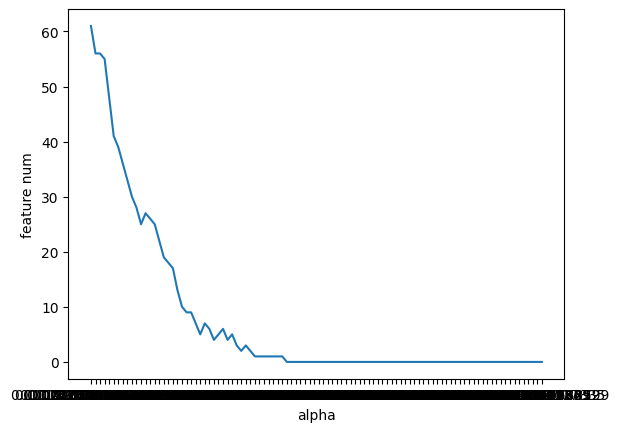

In [18]:
fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('feature num')
ax.set_xticks(ticks = range(len(alphas)),labels=alphas)
ax.plot(feature_num_list)

In [19]:
feature_num_list, np.where(np.array(feature_num_list) == 30)

([61,
  56,
  56,
  55,
  48,
  41,
  39,
  36,
  33,
  30,
  28,
  25,
  27,
  26,
  25,
  22,
  19,
  18,
  17,
  13,
  10,
  9,
  9,
  7,
  5,
  7,
  6,
  4,
  5,
  6,
  4,
  5,
  3,
  2,
  3,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 (array([9], dtype=int64),))

In [20]:
alpha = alphas[9]
alpha

0.01873817422860384

In [21]:
# Lasso回归筛选特征
# 观察max_iter值对特征筛选的影响
max_iters = [1000, 2000, 4000, 6000, 8000]  # alpha就是损失函数的lambda
feature_num_list = []
accuracy_list_train = []
accuracy_list_val = []

for max_iter in max_iters:
    model_lasso = Lasso(alpha = alpha, max_iter=max_iter, random_state=4).fit(X_train_min, y_train_min)

    # 评估筛选的特征数量
    coef = pd.Series(model_lasso.coef_, index=X_train_min.columns)
    feature_num = np.sum(coef != 0)
    feature_num_list.append(feature_num)

In [22]:
len(feature_num_list), np.max(feature_num_list), np.min(feature_num_list)

(5, 30, 30)

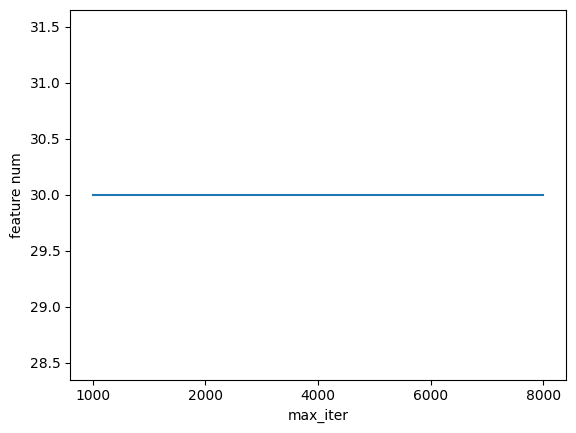

In [23]:
fig, ax = plt.subplots()
ax.set_xlabel('max_iter')
ax.set_ylabel('feature num')
ax.set_xticks(ticks = range(len(max_iters)),labels=max_iters)
ax.plot(feature_num_list)

In [24]:
model_lasso = Lasso(alpha = alpha, max_iter=2000, random_state=4).fit(X_train_min, y_train_min)
coef = pd.Series(model_lasso.coef_, index=X_train_min.columns)
index = coef[coef != 0].index

In [25]:
# lasso筛选后处理
X_train_min = X_train_min[index]
X_val_min = X_val_min[index]
X_test_min = X_test_min[index]

In [26]:
print(X_train_min.shape, X_val_min.shape, X_test_min.shape)

(1005, 30) (335, 30) (342, 30)


In [27]:
def get_AUC_accuracy(model, X_dataset, y_dataset):
    y_score = model.predict_proba(X_dataset)[:, 1]
    y_pred = model.predict(X_dataset)
    AUC = roc_auc_score(y_dataset, y_score)
    accuracy = accuracy_score(y_dataset, y_pred)
    return AUC, accuracy

In [60]:
model_LR = LogisticRegression(class_weight='balanced', max_iter=10000, solver='saga', n_jobs=-1, random_state=4, warm_start=True)
model_LR.fit(X_train_min, y_train_min)
get_AUC_accuracy(model_LR, X_train_min, y_train_min), get_AUC_accuracy(model_LR, X_val_min, y_val_min), get_AUC_accuracy(model_LR, X_test_min, y_test_min)

((0.8407792207792207, 0.755223880597015),
 (0.8082551594746716, 0.7432835820895523),
 (0.7878810298905001, 0.6988304093567251))

In [61]:
y_score = model_LR.predict_proba(X_train_min)[:, 1]

In [62]:
df = pd.DataFrame(columns=['Label', 'Pred'])
df['Label'] = y_train_min
df['Pred'] = y_score
df.to_csv('./resources/graphpad/LR_X_train_min.csv', index=False)

In [29]:
X_train_min.shape, y_train_min.shape

((1005, 30), (1005,))

In [53]:
model_SVM = SVC(probability=True)
model_SVM.fit(X_train_min, y_train_min)
get_AUC_accuracy(model_SVM, X_train_min, y_train_min), get_AUC_accuracy(model_SVM, X_val_min, y_val_min), get_AUC_accuracy(model_SVM, X_test_min, y_test_min)

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [63]:
model_RF = RandomForestClassifier(random_state=4, class_weight='balanced', n_estimators=100, min_samples_split=10, max_depth=16)
model_RF.fit(X_train_min, y_train_min)
get_AUC_accuracy(model_RF, X_train_min, y_train_min), get_AUC_accuracy(model_RF, X_val_min, y_val_min), get_AUC_accuracy(model_RF, X_test_min, y_test_min)

((0.9999204021784667, 0.9800995024875622),
 (0.821688555347092, 0.7671641791044777),
 (0.763909440662918, 0.6929824561403509))

In [66]:
y_score = model_RF.predict_proba(X_val_min)[:, 1]

In [67]:
df = pd.DataFrame(columns=['Label', 'Pred'])
df['Label'] = y_val_min
df['Pred'] = y_score
df.to_csv('./resources/graphpad/RF_X_train_min.csv', index=False)

In [16]:
# 临时保存下
# save_to_pickle(Path('./resources/temp_file/X_train.pkl'), X_train)
# save_to_pickle(Path('./resources/temp_file/y_train.pkl'), y_train)
# save_to_pickle(Path('./resources/temp_file/X_val.pkl'), X_val)
# save_to_pickle(Path('./resources/temp_file/y_val.pkl'), y_val)
# save_to_pickle(Path('./resources/temp_file/X_test.pkl'), X_test)
# save_to_pickle(Path('./resources/temp_file/y_test.pkl'), y_test)
# save_to_pickle(Path('./resources/temp_file/model_lassoCV.pkl'), model_lassoCV)

In [5]:
# 加载数据
X_train = load_pickle(Path('./resources/temp_file/X_train.pkl'))
y_train = load_pickle(Path('./resources/temp_file/y_train.pkl'))
X_val = load_pickle(Path('./resources/temp_file/X_val.pkl'))
y_val = load_pickle(Path('./resources/temp_file/y_val.pkl'))
X_test = load_pickle(Path('./resources/temp_file/X_test.pkl'))
y_test = load_pickle(Path('./resources/temp_file/y_test.pkl'))
model_lassoCV = load_pickle(Path('./resources/temp_file/model_lassoCV.pkl'))

In [6]:
# coef_代表LASSO计算出来的每个特征的系数
coef = pd.Series(model_lassoCV.coef_, index=X_train.columns)
lasso_index = coef[coef != 0].index
print('Lasso选择出的系数不为0的特征的个数:', len(lasso_index), lasso_index[0], lasso_index[-1])

Lasso选择出的系数不为0的特征的个数: 679 original_shape_Elongation gradient_ngtdm_Strength


In [7]:
# lasso回归后数据处理
X_train = X_train[lasso_index]
X_val = X_val[lasso_index]
X_test = X_test[lasso_index]

In [8]:
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape)

(13772, 679) (4593, 679) (4691, 679) (13772,)


In [ ]:
# 递归特征消除
estimator = LogisticRegressionCV(class_weight='balanced', cv=5, max_iter=100, solver='sag', n_jobs=-1)
rfe = RFE(estimator=estimator, n_features_to_select=30, step=1)
rfe = rfe.fit(X_train_min, y_train_min)

In [37]:
# 保存模型
# with open('./resources/temp_file/estimator.pkl', 'wb') as f:
#     pickle.dump(estimator, f)
# with open('./resources/temp_file/rfe.pkl', 'wb') as f:
#     pickle.dump(rfe, f)

In [12]:
# 加载模型
with open('./resources/temp_file/estimator.pkl', 'rb') as f:
    estimator = pickle.load(f)
with open('./resources/temp_file/rfe.pkl', 'rb') as f:
    rfe = pickle.load(f)
rfe: sklearn.feature_selection.RFE

In [13]:
print(rfe.n_features_, rfe.n_features_in_, rfe.n_features_to_select)

30 679 30


(0.8912249734016829, 0.7828054298642534)

In [15]:
# 在训练集和验证集上计算交叉熵损失
train_min_predictions = rfe.predict_proba(X_train_min)
train_min_loss = log_loss(y_train_min, train_min_predictions)

val_min_predictions = rfe.predict_proba(X_val_min)
val_min_loss = log_loss(y_val_min, val_min_predictions)

print("训练集交叉熵损失:", train_min_loss)
print("验证集交叉熵损失:", val_min_loss)

训练集交叉熵损失: 0.41196795130651687
验证集交叉熵损失: 0.611673492395658
